In [86]:
import os
import numpy as np
import matplotlib.pyplot as plt
# import igraph as ig
import networkx as nx

Question 1  
(-1/5, 1.0). emperically calcualated

Question 2

In [64]:
# Load data
path1 = './data/finance_data/Name_sector.csv'
path2 = './data/finance_data/data/'
n_rows = 765 # many files in finance_data/data have 765 rows (+1 for header), we only use these ones
n_files = len(os.listdir(path2))

stock_prices = []
stock_sectors = []
with open(path1, 'r') as name_sector_f:
    for f in os.listdir(path2):
        if len(f) > 3 and f[-3:] == 'csv': # skip DS_Store file
            line = name_sector_f.readline()
            n_lines = sum(1 for _ in open(path2 + f))
            if n_lines == n_rows + 1: # +1 for header
                stock_sectors.append(line.strip().split(',')) # strip() removes \n
                stock_prices.append(np.genfromtxt(path2 + f, delimiter=',', skip_header=1, usecols=4, dtype=np.float64))

stock_prices = np.array(stock_prices)

Text(0, 0.5, 'Frequency')

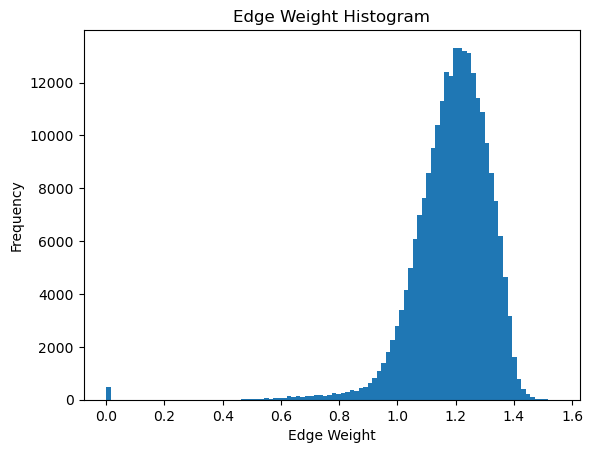

In [134]:
# Calculate values from Question 1
qi_t = (stock_prices[:, 1:] - stock_prices[:, :-1]) / stock_prices[:, :-1]
ri_t = np.log(1 + qi_t)
corr = np.corrcoef(ri_t)
assert len(corr) == len(stock_prices)

# Create graph and plot edge weight histogram
edges = np.sqrt(2 * (1 - corr))
# edges[np.abs(edges) < 1e-3] = 0
G = nx.from_numpy_matrix(edges)
_ = plt.hist(edges.flatten(), bins=100)
plt.title('Edge Weight Histogram')
plt.xlabel('Edge Weight')
plt.ylabel('Frequency')

Question 3